### Project requirements/Details are Given below

In [ ]:
# Coding Project: digits generation in sequence

# The goal of this project is to write a program that can generate images
# representing sequences of numbers, for data augmentation purposes.
# seq of number 1 3 9 4 5 .... 
# seq of number 2 1 2 3 9 5 .... 

# Hence  input => image [1 3 9 4 5 6]  ==> class [1 3 9 4 5 6]
# Hence input => image [2 1 2 3 9 5 ]  ==> class [2 1 2 3 9 5]

# digits have to be stacked horizontally

# spacing uniform distribution over a range determined by two user specified numbers
# {that means it will take the best/optimal spacing automatically}

# The numerical values of the digits themselves are provided by the user [1 3 9 4 5 6]
# each digit chosen randomly from one of its representations in the MNIST dataset

#The width of the output image in pixels is specified by the user.
# {it will take the space from the user predefined space range before}

#while the height should be 28 pixels (i.e. identical to that of the MNIST digits).  The
#code should contain both an API and a script.

In [1]:
import os
from mlxtend.data import loadlocal_mnist
import random
from PIL import Image
import numpy as np
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

### Handling dataset (Download + loading)

In [ ]:
#### Download data from  http://yann.lecun.com/exdb/mnist/ ###

In [2]:
# http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
# mlxtend-0.18.0
# return lebel and Image Map
def load_data(path, img_file, lbl_file):
    path_img = os.path.join(os.getcwd(), path, img_file)
    path_lbl = os.path.join(os.getcwd(), path, lbl_file)
    
    images, labels = loadlocal_mnist(
            images_path=path_img, 
            labels_path=path_lbl
    )
    # convering data to 32 bit floating point
    images = images.reshape(10000, 28, 28).astype('float32')
    
    return images, labels

In [3]:
## Load data API
x , y = load_data('MNIST-Sequence-master/data', 't10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte')

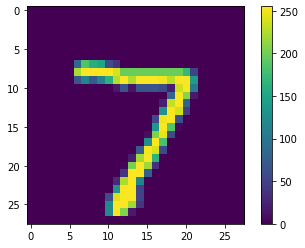

In [17]:
# Looking at the first Image in dataset
plt.imshow(x[0])
plt.colorbar()


In [42]:
def plot_samples(X_train, Y_train):
    num = 10
    images = X_train[:num]
    labels = Y_train[:num]

    num_row = 2
    num_col = 5
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

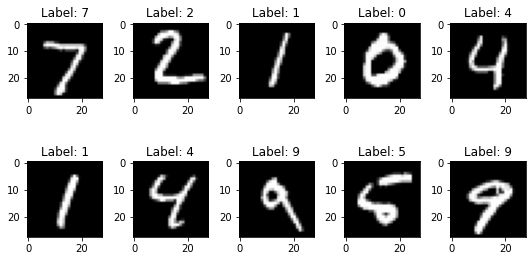

In [43]:
plot_samples(x, y)

### Mapping labels (class) position with values of class

In [81]:
def label_mapping(dataset_labels):
    # since we have 10 labels 0~9
    class_map = [[] for i in range(10)]
    
    # For i=0 it will be [[], [], [], [], [], [], [], [0], [], []]
    # Since dataset_labels[0] = 7 
    for i in range(len(dataset_labels)):
        class_map[dataset_labels[i]].append(i)
    
    return class_map

In [118]:
def space_generator(length_input_sequence, image_width, image_height, spacing_range):
    number_of_space = length_input_sequence - 1
    number_of_digits = length_input_sequence
    auto_space = (image_width - image_height * number_of_digits) / number_of_space
    if auto_space < 0:
        auto_space = 1
        print('Image_width is too short to fit (digits+space), Spacing is selected 1px')
        return auto_space
    elif spacing_range['min'] <= auto_space <= spacing_range['max']:
        return int(auto_space)
    else: 
        print(str(int(auto_space)), 'px space is needed to fit given width', image_width, 
              'allowed:', spacing_range)
        auto_space = random.randint(spacing_range['min'], spacing_range['max'])
        print('Choosing random space: ', auto_space, 'px')
        return auto_space

In [103]:
def generate_image(dataset_images, label_mapping, input_sequence, 
                   spacing_range, image_width, image_height=28):
    
    # find optimal space automatically
    auto_spacing = space_generator(len(input_sequence), image_width, image_height, spacing_range)
    # generate a ndarray for space (image_height=28, space)  
    spacing = np.ones(image_height * auto_spacing, dtype='float32').reshape(image_height, auto_spacing)

    # find the index of the given class - label
    # We are choosing samples index randomly 
    label_index = random.choice(label_mapping[input_sequence[0]])
    
    # get the image mapping from dataset [28x28] matrix 
    image = dataset_images[label_index]
    
    # stacking one after another [28x28] + [28x5] = [28x33]
    whole_image = np.hstack((image, spacing))
    
    
    # Making an array like this: [28x33] + [28x33] + [28x33] + [28x28]
    sequence_length = len(input_sequence)
    for i in range(1, sequence_length):
        label_index = choice(label_mapping[input_sequence[i]])
        if i < sequence_length-1:
            dataset_image = dataset_images[label_index]
            temp_image = np.hstack((dataset_image, spacing))
            whole_image = np.hstack((whole_image, temp_image))
        else:
            dataset_image = dataset_images[label_index]
            whole_image = np.hstack((whole_image, dataset_image))
    
    return whole_image

In [105]:
# Define the parameters for the function
label_maps = label_mapping(y) 
spacing = 10
all_images = x
image_height = 28
input_sequence = [3, 8, 9, 1, 5]
space_range = {'min': 0, 'max': 10}

In [119]:
whole_image_array = generate_image(all_images, label_maps, input_sequence, space_range, 200)

15 px space is needed to fit given width 200 allowed: {'min': 0, 'max': 10}
Choosing random space:  8 px


In [120]:
whole_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

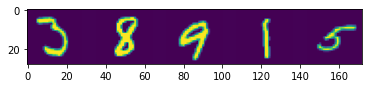

In [121]:
plt.imshow(whole_image_array)

In [47]:
def save_image(whole_image_array, input_sequence):
    img_name = "".join(list(map(str, input_sequence)))
    image = Image.fromarray(whole_image_array)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image.save(img_name + ".jpg")
    print(img_name + ".jpg" + ' saved')

In [21]:
num_samples = 10
seq_len = 5

In [31]:
def generate_random_sequence(num_samples, seq_len, dataset_images, label_mapping, spacing):
    inputs = []
    labels = []
    for i in range(num_samples):
        seq_values = np.random.randint(0, 10, seq_len)
        seq = generate_image(dataset_images, label_mapping, seq_values, spacing)
        inputs.append(seq)
        labels.append(seq_values)
    return np.array(inputs), np.array(labels)

In [34]:
num_samples = 7
seq_len = 5
dataset_images = x
label_idex_mapping = label_mapping(y)
spacing = 10

In [ ]:
inputs, labels = generate_random_sequence(num_samples, seq_len, dataset_images, label_idex_mapping, spacing)

In [48]:
labels

array([[7, 2, 0, 5, 8],
       [3, 6, 3, 3, 7],
       [4, 8, 1, 0, 4],
       [8, 2, 6, 1, 9],
       [4, 3, 2, 6, 7],
       [5, 5, 2, 2, 0],
       [9, 2, 8, 5, 7]])

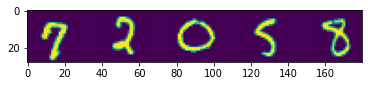

In [37]:
plt.imshow(inputs[0])

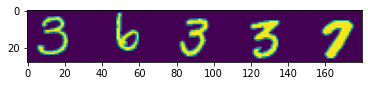

In [38]:
plt.imshow(inputs[1])

In [49]:
for i in range(num_samples):
    save_image(inputs[i], labels[i])

72058.jpg saved
36337.jpg saved
48104.jpg saved
82619.jpg saved
43267.jpg saved
55220.jpg saved
92857.jpg saved


In [67]:
# np.save('./pixel_mapping', inputs)
# np.save('./label_mapping', labels)
np.savez('generated_dataset', inputs, labels)

In [ ]:
np.load(os.path.join(os.getcwd(),'pixel_mapping.npy'))

In [68]:
def load_generated_data(path, dataset_name):
    dataset = os.path.join(path, dataset_name)
#     return np.load(px_file), np.load(lbl_file)
    return np.load(dataset)

In [69]:
generated_data = load_generated_data(os.getcwd(), 'generated_dataset.npz')

In [76]:
generated_data['arr_1']

array([[7, 2, 0, 5, 8],
       [3, 6, 3, 3, 7],
       [4, 8, 1, 0, 4],
       [8, 2, 6, 1, 9],
       [4, 3, 2, 6, 7],
       [5, 5, 2, 2, 0],
       [9, 2, 8, 5, 7]])

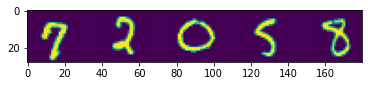

In [75]:
plt.imshow(generated_data['arr_0'][0])

## Data Augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.interpolation import shift

In [8]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [20]:
# Creating Augmented Dataset
X_train_augmented = [image for image in x]
y_train_augmented = [image for image in y]
aug_px = 3
for dx, dy in ((aug_px, 0), (-aug_px, 0), (0, aug_px), (0, -aug_px)):
     for image, label in zip(x, y):
         X_train_augmented.append(shift_image(image, dx, dy))
         y_train_augmented.append(label)

In [19]:
len(X_train_augmented), len(y_train_augmented)

(50000, 50000)

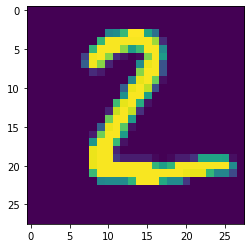

In [27]:
plt.imshow(X_train_augmented[1])

### More Augmentation

In [49]:
import tensorflow as tf
from keras.preprocessing import image as im

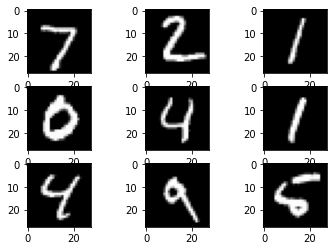

In [56]:

for i in range(0, 9):  
  plt.subplot(330 + 1 + i)  
  plt.imshow(x[i], cmap=plt.get_cmap('gray')) 
# show the plot 
plt.show()

/home/iftekhar/environments/exp_env/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (10000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


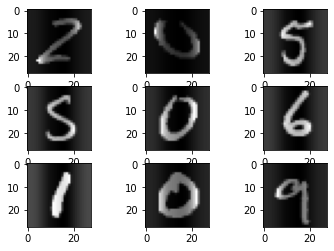

In [62]:
# Standardize images across the dataset, mean=0, stdev=1
# from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# from keras import backend as K
# K.set_image_dim_ordering('th')
# load data
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = x.reshape(x.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

/home/iftekhar/environments/exp_env/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


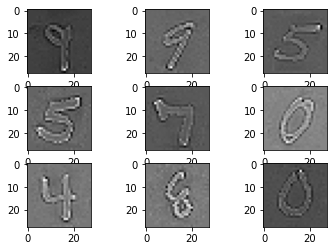

In [63]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

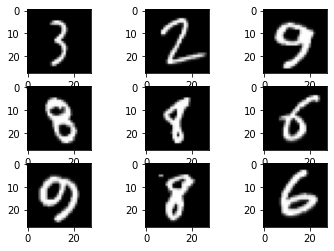

In [64]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=10)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

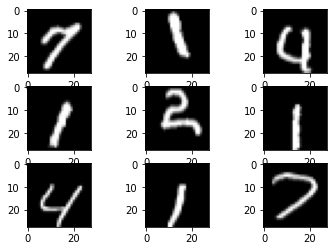

In [66]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break